In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array


In [2]:
dataset_path = 'deepfake'
categories = ['fake', 'real']
img_size = 128  
batch_size = 32
def load_images(dataset_path, categories, img_size):
    data = []
    labels = []
    
    for category in categories:
        path = os.path.join(dataset_path, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (img_size, img_size))
                image = img_to_array(image) / 255.0
                
                data.append(image)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    return np.array(data), np.array(labels)

In [3]:
data, labels = load_images(dataset_path, categories, img_size)

In [4]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=len(categories))
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=len(categories))


In [7]:
from sklearn.svm import SVC

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [10]:
model=Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())

C:\Users\minai\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
train_features = model.predict(train_data)
val_features = model.predict(val_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [15]:
train_labels = np.argmax(train_labels, axis=1) if len(train_labels.shape) > 1 else train_labels
val_labels = np.argmax(val_labels, axis=1) if len(val_labels.shape) > 1 else val_labels

In [16]:
train_labels

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score

In [18]:
svc = SVC(kernel='linear')
svc.fit(train_features, train_labels)

SVC(kernel='linear')

In [19]:
val_predictions = svc.predict(val_features)

In [20]:
accuracy = accuracy_score(val_labels, val_predictions)
print(f'SVC Accuracy: {accuracy:.4f}')

SVC Accuracy: 0.9806


In [21]:
svc = SVC(kernel='rbf')
svc.fit(train_features, train_labels)

SVC()

In [22]:
val_predictions = svc.predict(val_features)

In [23]:
val_predictions

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [24]:
accuracy = accuracy_score(val_labels, val_predictions)
print(f'SVC Accuracy: {accuracy:.4f}')

SVC Accuracy: 0.9845


In [25]:
svc.score(train_features,train_labels)

0.9718719689621726

In [26]:
svc.score(val_features,val_labels)

0.9844961240310077

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)

# Evaluate the classifier
val_predictions_knn = knn.predict(val_features)
accuracy_knn = accuracy_score(val_labels, val_predictions_knn)
print(f'k-NN Accuracy: {accuracy_knn:.4f}')

k-NN Accuracy: 0.9341


In [29]:
val_predictions_knn

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
extra=ExtraTreesClassifier()

In [32]:
extra.fit(train_features, train_labels)

ExtraTreesClassifier()

In [33]:
val_predictions_extra = extra.predict(val_features)

In [34]:
accuracy = accuracy_score(val_labels, val_predictions_extra)
print(f'extra Accuracy: {accuracy:.4f}')

extra Accuracy: 0.9535


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
randomforest=RandomForestClassifier()

In [37]:
randomforest.fit(train_features, train_labels)

RandomForestClassifier()

In [38]:
val_predictions_randomforest = randomforest.predict(val_features)

In [39]:
accuracy = accuracy_score(val_labels, val_predictions_randomforest)
print(f'randomforset Accuracy: {accuracy:.4f}')

randomforset Accuracy: 0.9380


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gaedientboosting=GradientBoostingClassifier()

In [42]:
gaedientboosting.fit(train_features, train_labels)

GradientBoostingClassifier()

In [43]:
val_predictions_gaedientboosting = gaedientboosting.predict(val_features)

In [44]:
accuracy = accuracy_score(val_labels, val_predictions_gaedientboosting)
print(f'gaedientboosting Accuracy: {accuracy:.4f}')

gaedientboosting Accuracy: 0.9574


In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [46]:
histgaedientboosting=HistGradientBoostingClassifier()

In [47]:
histgaedientboosting.fit(train_features, train_labels)

HistGradientBoostingClassifier()

In [48]:
val_predictions_histgaedientboosting = histgaedientboosting.predict(val_features)

In [49]:
accuracy = accuracy_score(val_labels, val_predictions_histgaedientboosting)
print(f'histgaedientboosting Accuracy: {accuracy:.4f}')

histgaedientboosting Accuracy: 0.9457


In [50]:
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(img_size, img_size, 3), pooling='avg')
base_model.trainable = False


In [51]:
train_features_tuned = base_model.predict(train_data)
val_features_tuned = base_model.predict(val_data)


33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 381ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step


In [97]:
svc = SVC(kernel='rbf')
svc.fit(train_features_tuned, train_labels)
val_predictions = svc.predict(val_features_tuned)
accuracy = accuracy_score(val_labels, val_predictions)
print(f'SVC Accuracy: {accuracy:.4f}')


SVC Accuracy: 0.9767


In [52]:
svc = SVC(kernel='linear')
svc.fit(train_features_tuned, train_labels)
val_predictions = svc.predict(val_features_tuned)
accuracy = accuracy_score(val_labels, val_predictions)
print(f'SVC Accuracy: {accuracy:.4f}')


SVC Accuracy: 0.9845


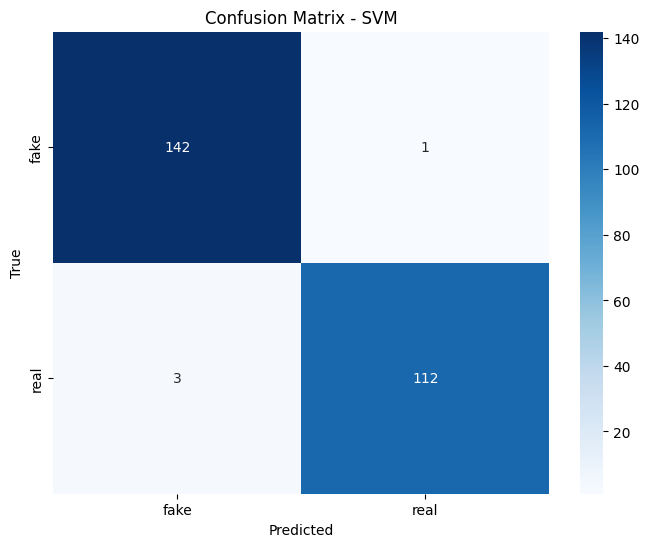

In [53]:
cm_knn = confusion_matrix(val_labels, val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

In [54]:
from sklearn.metrics import classification_report
report = classification_report(val_labels, val_predictions)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       143
           1       0.99      0.97      0.98       115

    accuracy                           0.98       258
   macro avg       0.99      0.98      0.98       258
weighted avg       0.98      0.98      0.98       258



In [99]:
svc = SVC(kernel='poly')
svc.fit(train_features_tuned, train_labels)
val_predictions = svc.predict(val_features_tuned)
accuracy = accuracy_score(val_labels, val_predictions)
print(f'SVC Accuracy: {accuracy:.4f}')


SVC Accuracy: 0.9806


In [100]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(, train_labels)
val_predictions_knn = knn.predict(val_features_tuned)
accuracy_knn = accuracy_score(val_labels, val_predictions_knn)
print(f'k-NN Accuracy: {accuracy_knn:.4f}')

k-NN Accuracy: 0.9574


In [101]:
extra.fit(train_features_tuned, train_labels)

ExtraTreesClassifier()

In [102]:
val_predictions_extra = extra.predict(val_features_tuned)

In [103]:
val_predictions_extra

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [106]:
accuracy = accuracy_score(val_labels, val_predictions_extra)
print(f'extra Accuracy: {accuracy:.4f}')

extra Accuracy: 0.9690


In [107]:
randomforest.fit(train_features_tuned, train_labels)

RandomForestClassifier()

In [108]:
val_predictions_randomforest = randomforest.predict(val_features_tuned)

In [109]:
accuracy = accuracy_score(val_labels, val_predictions_randomforest)
print(f'randomforset Accuracy: {accuracy:.4f}')

randomforset Accuracy: 0.9612


In [110]:
gaedientboosting.fit(train_features_tuned, train_labels)

GradientBoostingClassifier()

In [111]:
val_predictions_gaedientboosting = gaedientboosting.predict(val_features_tuned)

In [113]:
accuracy = accuracy_score(val_labels, val_predictions_gaedientboosting)
print(f'gaedientboosting Accuracy: {accuracy:.4f}')

gaedientboosting Accuracy: 0.9806


In [114]:
histgaedientboosting.fit(train_features_tuned, train_labels)

HistGradientBoostingClassifier()

In [115]:
val_predictions_histgaedientboosting = histgaedientboosting.predict(val_features_tuned)

In [116]:
accuracy = accuracy_score(val_labels, val_predictions_histgaedientboosting)
print(f'histgaedientboosting Accuracy: {accuracy:.4f}')

histgaedientboosting Accuracy: 0.9690


In [117]:
def preprocess_image(image_path, img_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_size, img_size))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [118]:
def predict_image(image_path, model, classifier, img_size, categories):
    image = preprocess_image(image_path, img_size)
    features = model.predict(image)
    prediction = classifier.predict(features)
    predicted_class = categories[int(prediction[0])]
    return predicted_class


In [122]:
new_image_path = 'deepfake/fake/fake_1.jpg'
predicted_class_svc = predict_image(new_image_path, base_model, svc, img_size, categories)
print(f'Predicted class (SVC): {predicted_class_svc}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class (SVC): fake


In [123]:
new_image_path = 'deepfake/real/real_5.jpg'
predicted_class_svc = predict_image(new_image_path, base_model, svc, img_size, categories)
print(f'Predicted class (SVC): {predicted_class_svc}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class (SVC): real
